In [1]:
import pandas as pd
import numpy as np

from datetime import timedelta, datetime

import seaborn as sns
import matplotlib.pyplot as plt

import Acquire as a

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = a.acquire_store()
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [4]:
df.shape

(913000, 7)

In [7]:
df.dtypes

sale_date         object
sale_amount        int64
item_brand        object
item_name         object
item_price       float64
store_address     object
store_zipcode      int64
dtype: object

In [8]:
df['sale_date'] = pd.to_datetime(df['sale_date'], infer_datetime_format = True)

df.dtypes

sale_date        datetime64[ns]
sale_amount               int64
item_brand               object
item_name                object
item_price              float64
store_address            object
store_zipcode             int64
dtype: object

In [10]:
df = df.set_index('sale_date')

df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [12]:
df = df.sort_index()
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221


In [14]:
cols_inv = ['item_brand', 'item_name', 'store_address']

for col in cols_inv:
    
    uniq = df[col].nunique()
    
    print(f'There are {uniq} unique values in {col} column')

There are 49 unique values in item_brand column
There are 50 unique values in item_name column
There are 10 unique values in store_address column


In [15]:
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [16]:
df.index.max() - df.index.min()

Timedelta('1825 days 00:00:00')

In [18]:
df.index.nunique()

1826

In [23]:
df.groupby(['item_brand', 'item_name'])[['sale_amount']].count().sort_values('item_brand')

,,sale_amount
item_brand,item_name,
Ahold,Ahold Cocoa Almonds,18260
Amys,Amys Light & Lean Spaghetti Italiano,18260
Back To Nature,Back To Nature Gluten Free White Cheddar Rice Thin Crackers,18260
Barefoot,Barefoot Pinot Grigio 187,18260
Bear Naked,Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,18260
Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scalloped 2 Pouches For 2 Meals - 2 Pk,18260
Boars Head,Boars Head Sliced White American Cheese - 120 Ct,18260
Burts Bees,Burts Bees Daily Moisturizing Cream Sensitive,18260
Careone,Careone Family Comb Set - 8 Ct,18260


In [38]:
df.groupby(['item_brand', 'item_name'])[['sale_amount']].count().sort_values('item_name')

,,sale_amount
item_brand,item_name,
Ahold,Ahold Cocoa Almonds,18260
Amys,Amys Light & Lean Spaghetti Italiano,18260
Back To Nature,Back To Nature Gluten Free White Cheddar Rice Thin Crackers,18260
Barefoot,Barefoot Pinot Grigio 187,18260
Bear Naked,Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,18260
Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scalloped 2 Pouches For 2 Meals - 2 Pk,18260
Boars Head,Boars Head Sliced White American Cheese - 120 Ct,18260
Burts Bees,Burts Bees Daily Moisturizing Cream Sensitive,18260
Careone,Careone Family Comb Set - 8 Ct,18260


<AxesSubplot:xlabel='sale_date'>

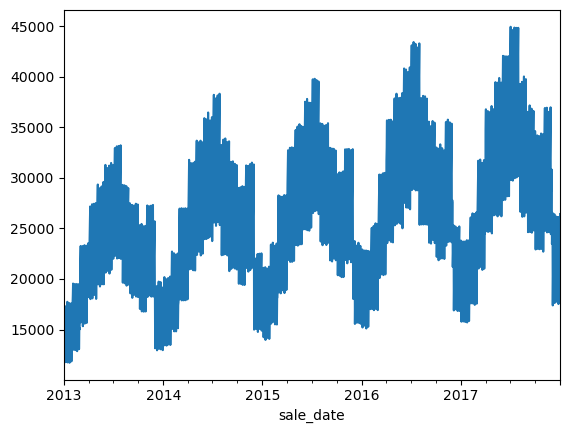

In [40]:
df.groupby('sale_date')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

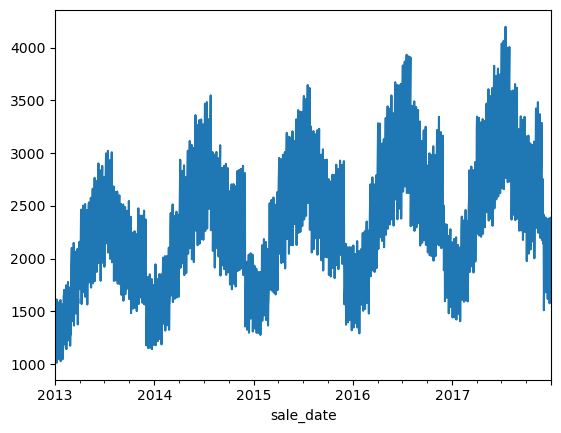

In [41]:
df[df['store_zipcode'] == 78253].groupby('sale_date')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

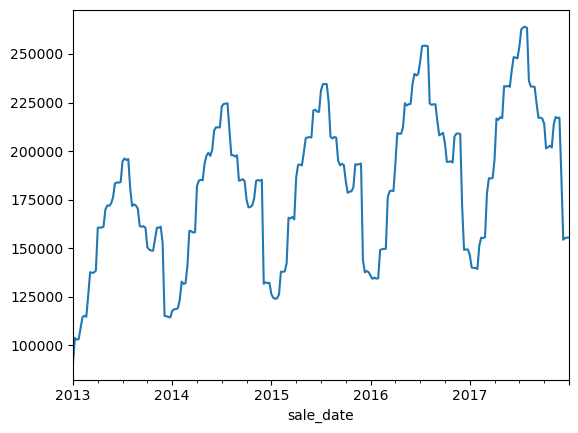

In [44]:
df.resample('W')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

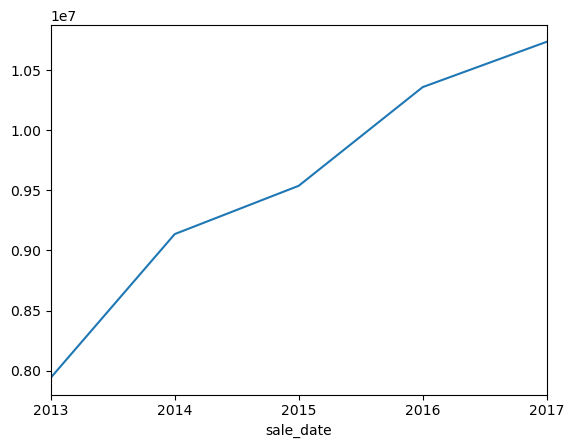

In [45]:
df.resample('Y')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

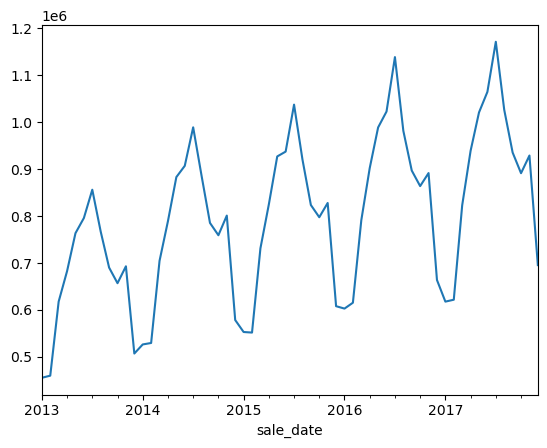

In [46]:
df.resample('M')['sale_amount'].sum().plot()